In [27]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [28]:
df=pd.read_csv('Iris.csv')

In [29]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [30]:
df=df.drop(columns=['Id'])

In [31]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [32]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [34]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [35]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<Axes: >

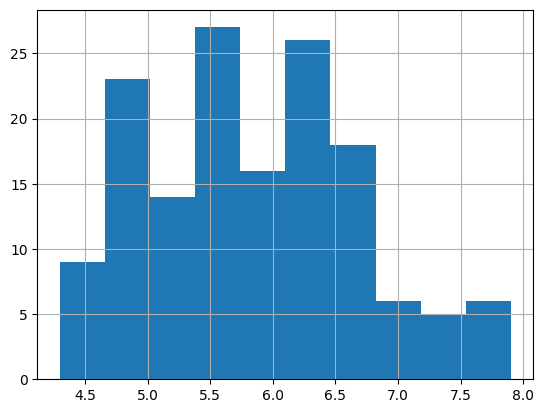

In [36]:
df['SepalLengthCm'].hist()

<Axes: >

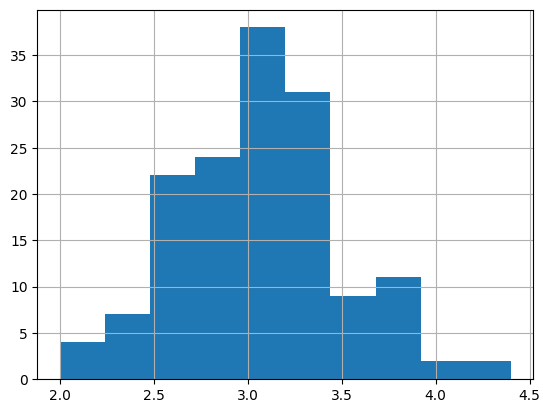

In [37]:
df['SepalWidthCm'].hist()

<Axes: >

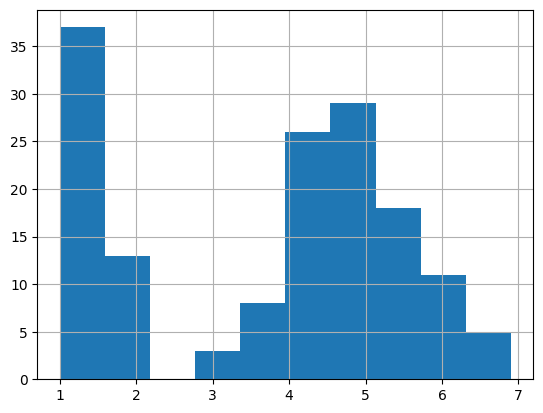

In [38]:
df['PetalLengthCm'].hist()

<Axes: >

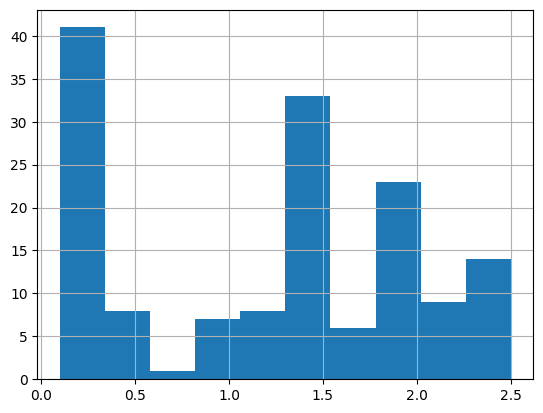

In [39]:
df['PetalWidthCm'].hist()

In [40]:
colors=['red','orange','blue']
species=['Iris-virginica', 'Iris-versicolor','Iris-setosa']

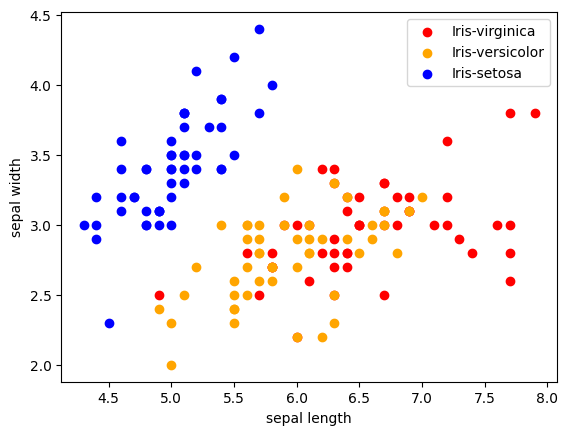

In [41]:
for i in range(3):
    x=df[df['Species']==species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c=colors[i], label=species[i])
    plt.xlabel("sepal length")
    plt.ylabel("sepal width")
    plt.legend()

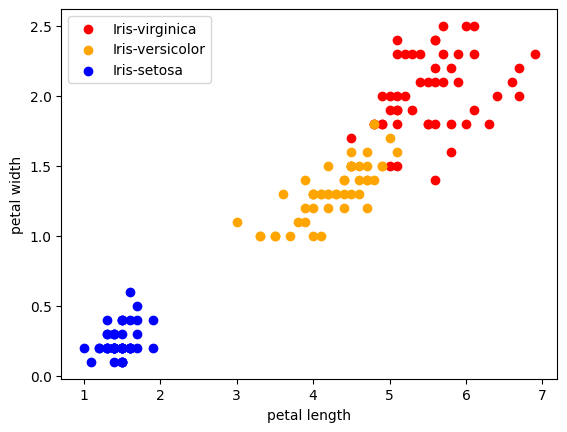

In [42]:
for i in range(3):
    x=df[df['Species']==species[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c=colors[i], label=species[i])
    plt.xlabel("petal length")
    plt.ylabel("petal width")
    plt.legend()

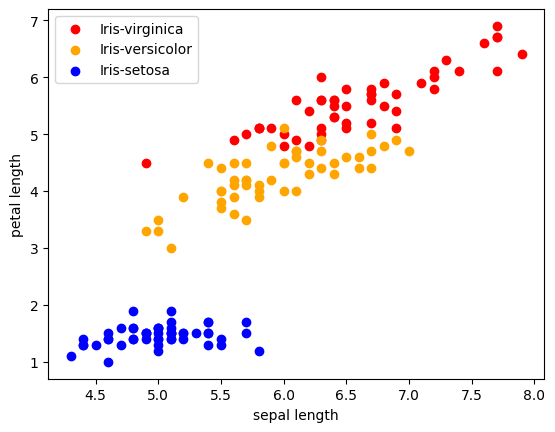

In [43]:
for i in range(3):
    x=df[df['Species']==species[i]]
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c=colors[i], label=species[i])
    plt.xlabel("sepal length")
    plt.ylabel("petal length")
    plt.legend()

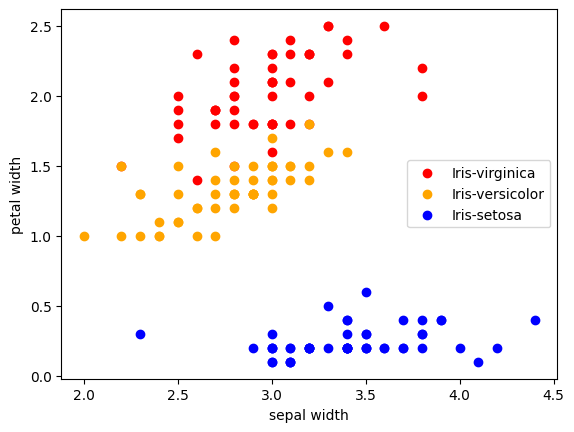

In [44]:
for i in range(3):
    x=df[df['Species']==species[i]]
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c=colors[i], label=species[i])
    plt.xlabel("sepal width")
    plt.ylabel("petal width")
    plt.legend()

               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000     -0.109369       0.871754      0.817954
SepalWidthCm       -0.109369      1.000000      -0.420516     -0.356544
PetalLengthCm       0.871754     -0.420516       1.000000      0.962757
PetalWidthCm        0.817954     -0.356544       0.962757      1.000000


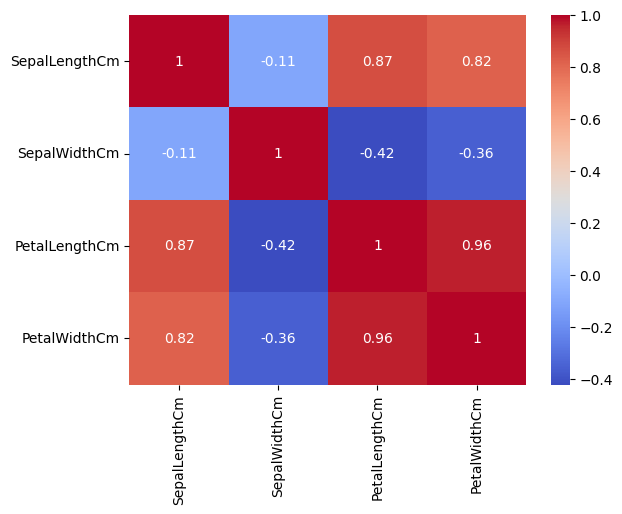

In [46]:
numeric_df = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Display the correlation matrix
print(correlation_matrix)

# Optionally, visualize the correlation matrix using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import pickle
X=df.drop(columns=['Species'])
Y=df['Species']
x_train,x_test,y_train,y_test=train_test_split(X,Y, test_size=0.30)

In [56]:
model=LogisticRegression()
model.fit(x_train,y_train)
print("Logistic Regression Accuracy:",model.score(x_test,y_test)*100)

Logistic Regression Accuracy: 95.55555555555556


In [57]:
model.fit(x_train.values,y_train.values)

LogisticRegression()

In [58]:
model=KNeighborsClassifier()
model.fit(x_train.values,y_train.values)
print("Accuracy:",model.score(x_test,y_test)*100)

Accuracy: 95.55555555555556


In [60]:
model.fit(x_train.values,y_train.values)

KNeighborsClassifier()

In [61]:
print("Accuracy:",model.score(x_test,y_test)*100)

Accuracy: 95.55555555555556


In [62]:
model=DecisionTreeClassifier()
model.fit(x_train.values,y_train.values)

DecisionTreeClassifier()

In [63]:
print("Accuracy:",model.score(x_test,y_test)*100)

Accuracy: 95.55555555555556


In [64]:
import pickle
filename='saved_model.sav'
pickle.dump(model, open(filename, 'wb'))


In [65]:
filename='saved_model.sav'
try:
    with open(filename, 'wb') as file:
        pickle.dump(model, file)
        print("model saved successfully")
except Exception as e:
    print("error")

model saved successfully


In [66]:
load_model=pickle.load(open(filename,'rb'))

In [67]:
load_model.predict([[6.0,2.2,4.0,1.0]])

array(['Iris-versicolor'], dtype=object)

In [68]:
x_test.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
11,4.8,3.4,1.6,0.2
24,4.8,3.4,1.9,0.2
142,5.8,2.7,5.1,1.9
124,6.7,3.3,5.7,2.1
67,5.8,2.7,4.1,1.0
